## Importing Data and required packages

In [67]:
import numpy as np
import seaborn as sns
import pandas as pd

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
data = pd.read_csv('Road Accident Data.csv')
data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


## Descriptive Analysis

In [109]:
data.Day_of_Week.value_counts()

Friday       50529
Tuesday      46386
Wednesday    46381
Thursday     45649
Monday       43918
Saturday     41566
Sunday       33544
Name: Day_of_Week, dtype: int64

In [110]:
data['Day_of_Week'].dtypes

dtype('O')

In [71]:
data.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [72]:
data.Accident_Severity.value_counts()

Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: Accident_Severity, dtype: int64

In [73]:
data.Junction_Detail.value_counts()

Not at junction or within 20 metres    123094
T or staggered junction                 96718
Crossroads                              29948
Roundabout                              27264
Private drive or entrance               10875
Other junction                           8315
Slip road                                4265
More than 4 arms (not roundabout)        4148
Mini-roundabout                          3346
Name: Junction_Detail, dtype: int64

In [74]:
data.Light_Conditions.value_counts()

Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: Light_Conditions, dtype: int64

In [75]:
data.Carriageway_Hazards.value_counts()

None                                               302546
Other object on road                                 2243
Any animal in carriageway (except ridden horse)      1620
Pedestrian in carriageway - not injured               715
Previous accident                                     511
Vehicle load on road                                  335
Name: Carriageway_Hazards, dtype: int64

In [76]:
data.Road_Type.value_counts()

Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               3234
Name: Road_Type, dtype: int64

In [77]:
data.Urban_or_Rural_Area.value_counts()

Urban    198532
Rural    109441
Name: Urban_or_Rural_Area, dtype: int64

In [78]:
data.Weather_Conditions.value_counts()

Fine no high winds       244496
Raining no high winds     34877
Other                      8802
Snowing no high winds      4839
Raining + high winds       3526
Fine + high winds          3148
Fog or mist                1690
Snowing + high winds        538
Name: Weather_Conditions, dtype: int64

In [79]:
data.Junction_Control.value_counts()

Give way or uncontrolled               150045
Data missing or out of range            98056
Auto traffic signal                     32256
Not at junction or within 20 metres     25378
Stop sign                                1685
Authorised person                         460
Auto traffic sigl                          93
Name: Junction_Control, dtype: int64

In [80]:
data.Road_Surface_Conditions.value_counts()

Dry                     208967
Wet or damp              81479
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: Road_Surface_Conditions, dtype: int64

<AxesSubplot: >

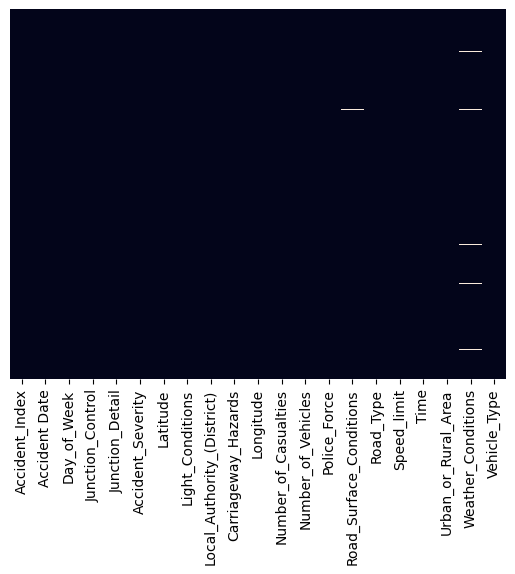

In [81]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False)

## Conversion of word data to interger

In [82]:
data['Day_of_Week']=data['Day_of_Week'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})

In [83]:
data['Accident_Severity']=data['Accident_Severity'].replace({'Fetal':'Fatal'})

In [84]:
data['Accident_Severity']=data['Accident_Severity'].replace({'Fatal':2, 'Slight':0, 'Serious':1})

In [85]:
data['Light_Conditions'] = data['Light_Conditions'].replace({'Daylight': 0, 'Darkness - lights lit': 1, 'Darkness - no lighting':2, 'Darkness - lighting unknown': 3, 'Darkness - lights unlit': 4})

In [86]:
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].replace({'Urban':0, 'Rural':1})

In [87]:
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].replace({'Dry':0, 'Wet or damp':1, 'Frost or ice':2, 'Snow':3, 'Flood over 3cm. deep':4})

## Filling the Null and NaN values

In [88]:
data['Road_Surface_Conditions'].fillna(0, inplace=True)

In [89]:
data = data.replace(to_replace='NULL', value=0)

## Dropping the irrelevant columns

In [90]:
data.drop(['Junction_Control', 'Junction_Detail', 'Local_Authority_(District)', 'Carriageway_Hazards'], axis=1, inplace = True)

In [91]:
data.drop(['Police_Force', 'Road_Type', 'Weather_Conditions', 'Vehicle_Type'], axis=1, inplace = True)

In [92]:
data.drop(['Accident_Index', 'Accident Date', 'Time'], axis =1, inplace =True)

In [93]:
data.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

## Building a Linear Regression model

In [94]:
X_train = data.drop(['Number_of_Casualties'], axis=1)
y_train = data['Number_of_Casualties']

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
LR = LinearRegression()

In [97]:
LR.fit(X_train, y_train)

LinearRegression()

In [98]:
LR_Accuracy = LR.score(X_train, y_train)*100
LR_Accuracy

8.091527294862233

## Building a Random Forest Regression model

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
RFR_Accuracy = RFR.score(X_train, y_train)*100

In [102]:
RFR_Accuracy

14.417368561765842

## Building a Decision Tree Regression model

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [105]:
DTR_Accuracy = DTR.score(X_train, y_train)*100
DTR_Accuracy

14.918203277843656

## Conclusion